In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
f = files.upload()

Saving total_data_na.csv to total_data_na.csv


In [3]:
dataset = pd.read_csv('total_data_na.csv')

In [4]:
dataset.head()

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.0,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.0,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.0,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.0,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.0,0,0,0,0


In [5]:
X = dataset.iloc[:,[3,4]].values

In [6]:
import scipy.cluster.hierarchy as sch

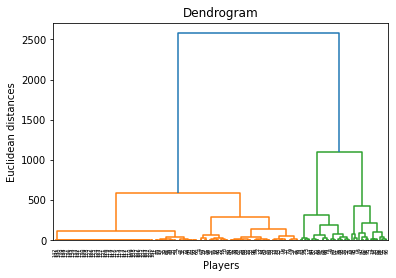

In [8]:
dendrogram = sch.dendrogram(sch.linkage(X,method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Players')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='ward')

In [10]:
y_hc = hc.fit_predict(X)

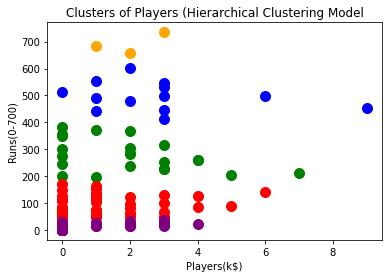

In [12]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='green', label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='red', label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue', label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='purple', label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange', label='Cluster 5')
plt.title('Clusters of Players (Hierarchical Clustering Model')
plt.xlabel('Players(k$)')
plt.ylabel('Runs(0-700)')
plt.show()

In [13]:
import pandas as pd
import os

In [16]:
papers  = pd.read_csv('/content/drive/MyDrive/DataSets/papers.csv')

In [17]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [18]:
#Cleaning
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
4420,1991,Segmentation Circuits Using Constrained Optimi...,Abstract Missing,Segmentation Circuits Using Constrained\nOptim...
2579,2007,Support Vector Machine Classification with Ind...,"In this paper, we propose a method for support...",Support Vector Machine Classification\nwith In...
4965,2014,Learning to Search in Branch and Bound Algorithms,Branch-and-bound is a widely used method in co...,Learning to Search in Branch-and-Bound Algorit...
6039,2016,PerforatedCNNs: Acceleration through Eliminati...,We propose a novel approach to reduce the comp...,PerforatedCNNs: Acceleration through Eliminati...
254,1996,Local Bandit Approximation for Optimal Learnin...,Abstract Missing,Local Bandit Approximation\nfor Optimal Learni...


In [19]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]','',x))

In [20]:
#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

4420    segmentation circuits using constrained\noptim...
2579    support vector machine classification\nwith in...
4965    learning to search in branch-and-bound algorit...
6039    perforatedcnns: acceleration through eliminati...
254     local bandit approximation\nfor optimal learni...
Name: paper_text_processed, dtype: object

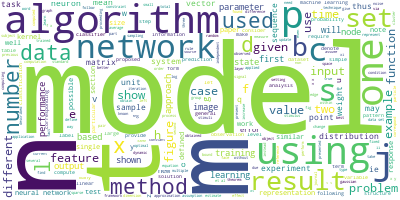

In [21]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [22]:
#Prepare text for LDA
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [24]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

In [25]:
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['segmentation', 'circuits', 'using', 'constrained', 'optimization', 'john', 'harris', 'mit', 'ai', 'lab', 'technology', 'sq', 'rm', 'cambridge', 'abstract', 'novel', 'segmentation', 'algorithm', 'developed', 'utilizing', 'absolutevalue', 'smoothness', 'penalty', 'instead', 'common', 'quadratic', 'regularizer', 'functional', 'imposes', 'piece']


In [26]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 10), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 2), (11, 1), (12, 5), (13, 5), (14, 5), (15, 1), (16, 1), (17, 21), (18, 1), (19, 5), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


In [27]:
#LDA Model Training
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"model" + 0.006*"learning" + 0.006*"data" + 0.005*"set" + '
  '0.004*"network" + 0.004*"time" + 0.004*"one" + 0.004*"number" + '
  '0.004*"using" + 0.004*"algorithm"'),
 (1,
  '0.006*"model" + 0.005*"learning" + 0.004*"algorithm" + 0.004*"neural" + '
  '0.004*"set" + 0.004*"data" + 0.004*"network" + 0.004*"matrix" + '
  '0.004*"training" + 0.003*"results"'),
 (2,
  '0.007*"model" + 0.005*"network" + 0.005*"time" + 0.004*"two" + 0.004*"set" '
  '+ 0.004*"learning" + 0.004*"training" + 0.004*"different" + 0.004*"number" '
  '+ 0.003*"neural"'),
 (3,
  '0.006*"data" + 0.005*"learning" + 0.005*"model" + 0.005*"using" + '
  '0.003*"time" + 0.003*"information" + 0.003*"one" + 0.003*"training" + '
  '0.003*"number" + 0.003*"set"'),
 (4,
  '0.006*"learning" + 0.005*"model" + 0.005*"data" + 0.004*"time" + '
  '0.004*"matrix" + 0.004*"information" + 0.004*"one" + 0.004*"using" + '
  '0.004*"network" + 0.003*"set"'),
 (5,
  '0.006*"learning" + 0.006*"set" + 0.005*"model" + 0.005*"tr

In [28]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=ee500104ef60536b93d89f6edff0ac99692a2193014b9e70a94ea6ec8034ec7c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=ebbd84e8b86df9c6f5b190db586eba99fe51fb77b49cd8658daa718776e6b8a1
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [29]:
#import pyLDAvis.gensim
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [31]:
# **pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.000836 -0.004622       1        1  15.735731
6      0.003494 -0.006646       2        1  14.279695
7     -0.011656 -0.000736       3        1  12.591353
1      0.003343  0.008017       4        1  12.233251
9     -0.007434  0.001680       5        1   9.833788
2      0.011891 -0.002171       6        1   8.653402
3     -0.001831  0.001557       7        1   8.175446
5      0.000645  0.002307       8        1   7.293966
4     -0.001950 -0.006448       9        1   7.025349
8      0.002661  0.007064      10        1   4.178020, topic_info=           Term         Freq        Total Category  logprob  loglift
334       model  1242.000000  1242.000000  Default  30.0000  30.0000
371         one   808.000000   808.000000  Default  29.0000  29.0000
488         set   961.000000   961.000000  Default  28.0000  28.0000
923    learning  1253.000000  125